In [1]:
import tensorflow as tf
from keras import models, layers
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [51]:
IM_SIZE=256
BTCH_SIZE=32
input_shape = (32,256,256,3)
n_classes = 2

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory="/content/drive/MyDrive/Pepper_data",
    shuffle=True,
    image_size=(IM_SIZE,IM_SIZE),
    batch_size=BTCH_SIZE
)

Found 2475 files belonging to 2 classes.


In [4]:
class_lst=dataset.class_names

### getting batch label from a particular batch set

In [32]:
list(dataset.take(3).as_numpy_iterator())[2][1].shape

(32,)

### getting particular image from a batch data

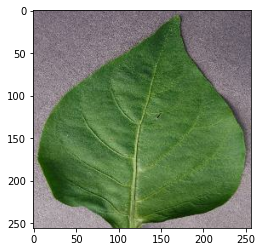

In [15]:
plt.imshow(list(dataset.take(3).as_numpy_iterator())[2][0][0].astype('uint8'))

In [43]:
def draw_plot(batch_no,total_images,ncols):
  plt.figure(figsize=(10,10))
  img=list(dataset.take(batch_no+1).as_numpy_iterator())[batch_no][0]
  batch_label=list(dataset.take(batch_no+1).as_numpy_iterator())[batch_no][1]
  for i in range(total_images):
    total_rows=int((total_images/ncols))
    ax=plt.subplot(total_rows,ncols,i+1)
    plt.title(class_lst[batch_label[i]])
    plt.imshow(img[i].astype('uint8'))
    plt.axis('off')

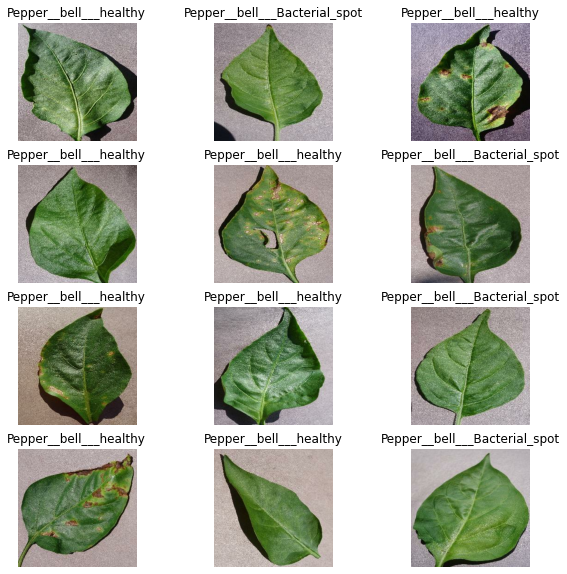

In [45]:
draw_plot(1,12,3)

In [46]:
def get_split_data(df,train_per=0.8,val_per=0.1,test_per=0.1,shuffle=True,shuffle_size=10000):
  if shuffle:
    df.shuffle(shuffle_size,seed=3)
  train_size=round(len(df)*train_per)
  val_size=round(len(df)*val_per)
  train_ds=df.take(round(train_size))
  train_val_ds=df.skip(round(train_size)).take(round(val_size))
  test_ds=df.skip(round(train_size)).skip(round(val_size))
  return train_ds,train_val_ds,test_ds

In [47]:
train_data,train_val_data,test_data=get_split_data(dataset)

In [50]:
resize_rescale= tf.keras.Sequential([
layers.Resizing(256,256),
layers.Rescaling(1.0/255)
])

In [52]:
model = models.Sequential([
    resize_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [55]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

call_back_hist= model.fit(train_data,
    batch_size=32,
    validation_data=train_val_data,
    verbose=1,
    epochs=15)

Epoch 1/15
62/62 [==============================] - 690s 11s/step - loss: 0.5257 - accuracy: 0.7046 - val_loss: 0.2899 - val_accuracy: 0.8750
Epoch 2/15
62/62 [==============================] - 10s 146ms/step - loss: 0.2441 - accuracy: 0.9093 - val_loss: 0.1823 - val_accuracy: 0.9375
Epoch 3/15
62/62 [==============================] - 9s 145ms/step - loss: 0.1450 - accuracy: 0.9491 - val_loss: 0.0857 - val_accuracy: 0.9688
Epoch 4/15
62/62 [==============================] - 10s 156ms/step - loss: 0.0903 - accuracy: 0.9733 - val_loss: 0.0548 - val_accuracy: 0.9805
Epoch 5/15
62/62 [==============================] - 9s 130ms/step - loss: 0.0579 - accuracy: 0.9803 - val_loss: 0.0594 - val_accuracy: 0.9844
Epoch 6/15
62/62 [==============================] - 9s 146ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0767 - val_accuracy: 0.9922
Epoch 7/15
62/62 [==============================] - 9s 144ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0157 - val_accuracy: 0.9922
Epoc

In [56]:
model.evaluate(test_data)

8/8 [==============================] - 5s 60ms/step - loss: 0.0825 - accuracy: 0.9872


[0.0825369730591774, 0.9872340559959412]

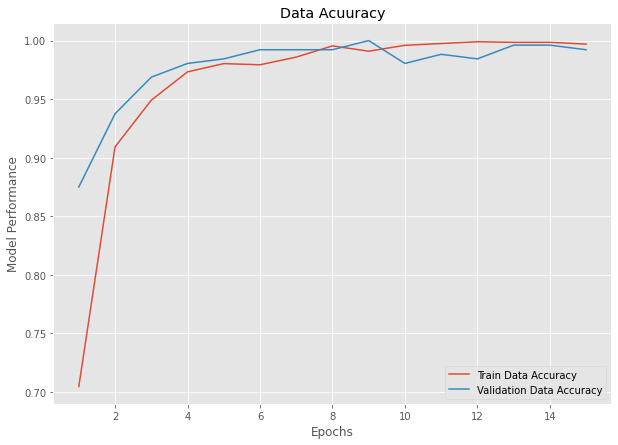

In [57]:
train_data_acc=call_back_hist.history['accuracy']
val_data_acc=call_back_hist.history['val_accuracy']

with plt.style.context(('ggplot')):
  plt.figure(figsize=(10,7))
  plt.plot(np.arange(1,16),train_data_acc,label="Train Data Accuracy")
  plt.plot(np.arange(1,16),val_data_acc,label="Validation Data Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Model Performance")
  plt.title("Data Acuuracy")
  plt.legend()
  plt.show()

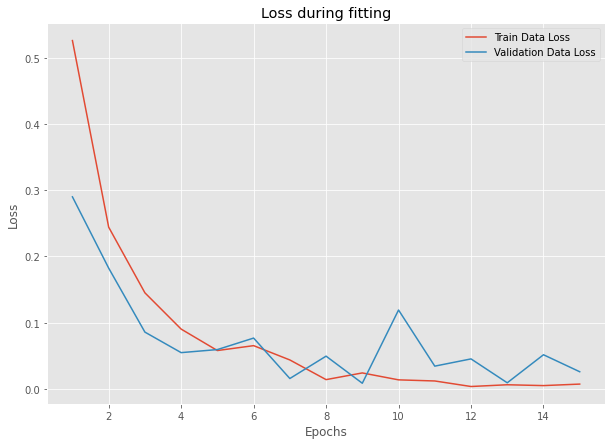

In [60]:
train_data_loss=call_back_hist.history['loss']
val_data_loss=call_back_hist.history['val_loss']

with plt.style.context(('ggplot')):
  plt.figure(figsize=(10,7))
  plt.plot(np.arange(1,16),train_data_loss,label="Train Data Loss")
  plt.plot(np.arange(1,16),val_data_loss,label="Validation Data Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss during fitting")
  plt.legend()
  plt.show()

In [79]:
def predict(model, img):
    img_array = tf.expand_dims(img, axis=0)
    predictions = model.predict(img_array)
    print(predictions)

    predicted_class = class_lst[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step
[[1.0000000e+00 1.5012397e-24]]
1/1 [==============================] - 0s 22ms/step
[[0.22971977 0.7702802 ]]
1/1 [==============================] - 0s 24ms/step
[[1.000000e+00 5.470688e-10]]
1/1 [==============================] - 0s 23ms/step
[[1.7227235e-04 9.9982774e-01]]


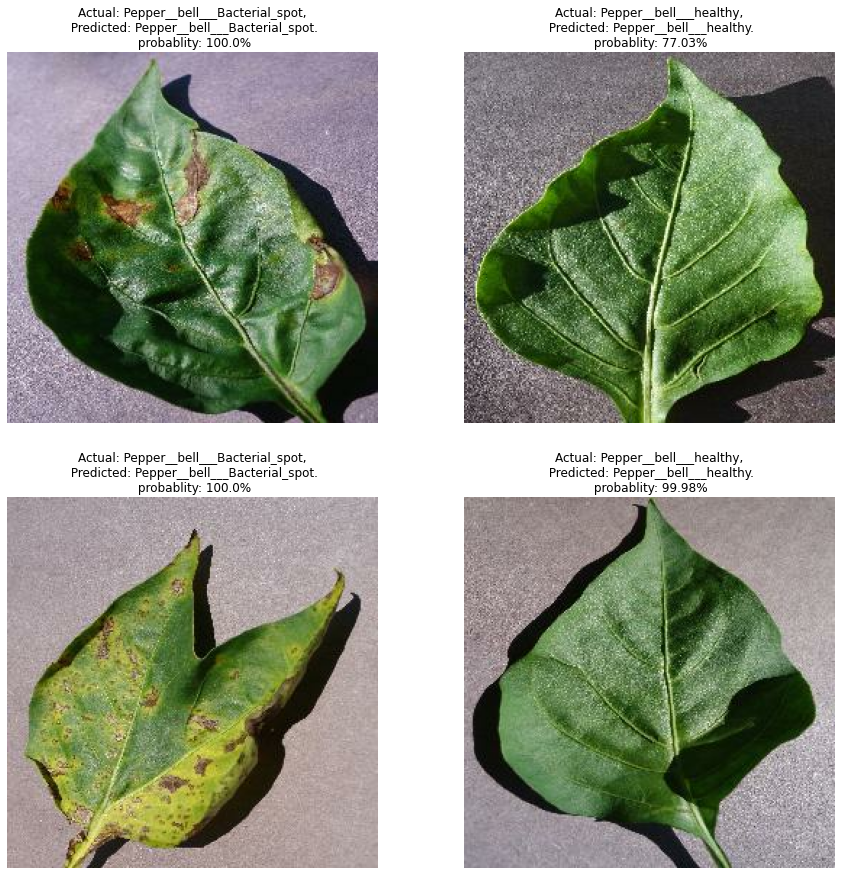

In [81]:
plt.figure(figsize=(15, 15))
for images, labels in test_data.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_lst[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n probablity: {confidence}%")
        
        plt.axis("off")